## Traveling Salesman Problem - Simulated Annealing

### Import Packages

In [1]:
from pyomo.environ import *
import pyomo.environ as pyo
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import clear_output
import time
import copy

### Inputs

In [2]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of cities
n=100

#Coordinate Range
rangelct=10000

#No. of swaps at each iteration
no_swap=1

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

#Compute distance between locations
distancelct=np.empty([n, n])
for i_index in range(n):
    for j_index in range(n):
        distancelct[i_index,j_index]=(math.sqrt(((coordlct_x[i_index]-coordlct_x[j_index])**2) +((coordlct_y[i_index]-coordlct_y[j_index])**2)))    

distancelct[np.diag_indices_from(distancelct)] = 99999

df = pd.DataFrame(distancelct)
df.index += 1
df.columns += 1
cij_model=df.stack().to_dict()


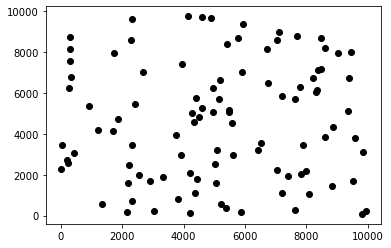

In [3]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Solution Representation and Initial Solution

In [4]:
random.seed(1)
Solution_i=random.sample(list(range(n)), n)

dfSolution_i=pd.DataFrame(Solution_i)
dfSolution_i
dflinkindex_p1=dfSolution_i
dflinkindex_p2=dfSolution_i.shift(-1)
dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
linkindex_p1=dflinkindex_p1.to_numpy()
linkindex_p2=dflinkindex_p2.to_numpy()
linkindex_p1=linkindex_p1.astype(int)
linkindex_p2=linkindex_p2.astype(int)
linkindex_p1=linkindex_p1.transpose()[0]
linkindex_p2=linkindex_p2.transpose()[0]


In [5]:
linkindex_p1

array([17, 72, 97,  8, 32, 15, 63, 57, 60, 83, 48, 26, 12, 62,  3, 49, 55,
       77,  0, 92, 34, 29, 75, 13, 40, 85,  2, 74, 69,  1, 89, 27, 54, 98,
       28, 56, 93, 35, 14, 22, 61, 43, 59, 71, 78, 18, 70, 88, 86, 41,  6,
       11, 82, 46, 67,  7, 21, 95, 68, 42, 87, 19, 45, 31, 47, 25, 73, 30,
       94, 23, 79, 39, 76, 58,  5, 64, 99, 91, 52, 24, 33, 80, 16, 66, 90,
       96, 50, 84, 36, 44, 81, 10,  9, 38, 20,  4, 51, 65, 37, 53])

In [6]:
linkindex_p2

array([72, 97,  8, 32, 15, 63, 57, 60, 83, 48, 26, 12, 62,  3, 49, 55, 77,
        0, 92, 34, 29, 75, 13, 40, 85,  2, 74, 69,  1, 89, 27, 54, 98, 28,
       56, 93, 35, 14, 22, 61, 43, 59, 71, 78, 18, 70, 88, 86, 41,  6, 11,
       82, 46, 67,  7, 21, 95, 68, 42, 87, 19, 45, 31, 47, 25, 73, 30, 94,
       23, 79, 39, 76, 58,  5, 64, 99, 91, 52, 24, 33, 80, 16, 66, 90, 96,
       50, 84, 36, 44, 81, 10,  9, 38, 20,  4, 51, 65, 37, 53, 17])

In [7]:
#Compute Objective Value
ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
ObjValue

508089.55416686134

In [8]:
#Exchange Operator
def swap_random(seq):
    idx = range(len(seq))
    i1, i2 = random.sample(idx, 2)
    seq[i1], seq[i2] = seq[i2], seq[i1]

In [9]:
#Insert Operator
def insert_random(seq):
    idx = range(len(seq))
    i1=random.sample(idx, 1)
    remove_index=np.where(np.array(seq)==i1)
    seq.pop(int(remove_index[0]))
    seq.insert(random.sample(idx, 1)[0], i1[0])
    

In [10]:
#3-Opt
def k_opt(seq):
    global Solution_i
    idx = range(len(seq))
    i1=np.sort(random.sample(idx, 2))

    #Split in 3 
    Opt1=seq[0:i1[0]]
    Opt2=seq[(i1[0]):i1[1]]
    Opt3=seq[(i1[1]):len(seq)]
    Opt2rev=Opt2[::-1]
    Opt3rev=Opt3[::-1]

    #3-Opt Solutions
    Sol1=Opt1+Opt2rev+Opt3rev
    Sol2=Opt1+Opt3+Opt2
    Sol3=Opt1+Opt3+Opt2rev
    Sol4=Opt1+Opt3rev+Opt2

    #2 Opt Solution
    Sol5=Opt1+Opt2rev+Opt3
    Sol6=Opt1+Opt2+Opt3rev
    Sol7=Opt1+Opt3rev+Opt2rev

    OptNeigh=[Sol1,Sol2,Sol3,Sol4,Sol5,Sol6,Sol7]

    ObjValue_Neigh=list();
    #Compute Obj Value of All Solutions
    for i_index in range(len(OptNeigh)):
        Solution_Neigh=OptNeigh[i_index]

        dfSolution_i=pd.DataFrame(Solution_Neigh)
        dflinkindex_p1=dfSolution_i
        dflinkindex_p2=dfSolution_i.shift(-1)
        dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
        linkindex_p1=dflinkindex_p1.to_numpy()
        linkindex_p2=dflinkindex_p2.to_numpy()
        linkindex_p1=linkindex_p1.astype(int)
        linkindex_p2=linkindex_p2.astype(int)
        linkindex_p1=linkindex_p1.transpose()[0]
        linkindex_p2=linkindex_p2.transpose()[0]

        #Compute Objective Value
        ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
        ObjValue_Neigh=np.append(ObjValue_Neigh,ObjValue)
        OptNeigh[np.argmin(ObjValue_Neigh)]
        Solution_i=OptNeigh[np.argmin(ObjValue_Neigh)]


### Simulated Annealing Algorithm

In [11]:
random.seed(3)
iteration=0
ObjValueOpt=ObjValue
Objvalue_list=ObjValue
program_starts = time.time()
cputime_i=[0,0]
OptSolution=Solution_i
temp=1000000
it_T=0
#itmax=20000

tp = temp
while cputime_i[-1]<150:
#while iteration<itmax:
    
    iteration=iteration+1
    Solution_i=copy.deepcopy(OptSolution)
    
    swap_it=0
    
    #Apply search operator
    while swap_it<no_swap:
        k_opt(Solution_i)
        swap_it=swap_it+1
        
    dfSolution_i=pd.DataFrame(Solution_i)
    dfSolution_i
    dflinkindex_p1=dfSolution_i
    dflinkindex_p2=dfSolution_i.shift(-1)
    dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
    linkindex_p1=dflinkindex_p1.to_numpy()
    linkindex_p2=dflinkindex_p2.to_numpy()
    linkindex_p1=linkindex_p1.astype(int)
    linkindex_p2=linkindex_p2.astype(int)
    linkindex_p1=linkindex_p1.transpose()[0]
    linkindex_p2=linkindex_p2.transpose()[0]
    
    #Compute Objective Value
    ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
    
    #Compute Acceptance Rate
    diff = ObjValue-ObjValueOpt
    
    #Calculate temperature for current iteration
    if it_T>20:
        tp = temp / float(iteration + 1)
        #tp=temp*(1-iteration/itmax)**100
        it_T=0
    #tp = tp *0.9999
    #tp= temp / np.log(iteration + 1)
    #print(tp)
    
    it_T=it_T+1
    
    #Calculate metropolis acceptance criterion
    metropolis = np.exp(-diff / tp)
    
    #Update Optimal Solution
    if diff < 0 or random.random() < metropolis:
        ObjValueOpt=copy.deepcopy(ObjValue)
        OptSolution=copy.deepcopy(Solution_i)
        
        Objvalue_list=np.append(Objvalue_list, ObjValueOpt)
        now = time.time()
        cputime_i=np.append(cputime_i, now-program_starts)
    
    print(ObjValueOpt)
            
#Update last objective value
Objvalue_list=np.append(Objvalue_list, min(Objvalue_list))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

508554.7842084156
504680.3673511182
501793.7230391341
501503.06187658693
501503.0618765867
485516.3954006878
485969.3647054561
482071.46830458037
477110.95627918956
475274.44051753177
465550.82107567147
460929.5279831249
471770.6259875951
471770.6259875951
472085.8318069606
473218.10164027027
460804.1552896315
456015.54324835906
458464.02449921233
461036.7225057993
455213.16074437526
454086.73075468425
448619.72710711736
447900.6669962374
448675.0109756708
448533.2292221347
450879.77275037207
455032.76311828935
452580.9338132213
450899.676488174
453782.313391127
453377.6962524646
454104.40524373745
454284.5592639398
454284.5592639398
448094.7718253505
448109.0566934729
446704.8852300553
442813.10854763945
444201.70743763726
440926.21495436976
442931.61937816296
444011.37462955934
441560.6514335672
442133.3192589848
443642.64829977736
444543.3796286999
444601.87426700006
441028.9093940829
436357.093325405
434869.28278218023
432951.8154788495
437411.4873686268
438170.80866174505
440531.2

229624.32569763967
229075.32565164074
229842.28373326434
229616.69289023613
231423.68136167724
229143.0405777067
224189.58862326396
223016.9223269396
223016.9223269396
223016.9223269396
223016.9223269396
223016.9223269396
222726.31402745555
223016.9223269396
223016.9223269396
223016.9223269396
224108.26715961844
226793.76114806253
224959.00175577137
224118.36861950363
223185.41779944696
223185.41779944696
223185.41779944696
223185.41779944696
223185.41779944696
224602.0525652584
224602.0525652584
224602.0525652584
225133.624392963
227540.61711158126
227540.61711158126
227540.61711158126
227464.34596002335
227464.34596002335
227464.34596002335
227464.34596002335
227464.34596002335
227464.34596002335
227464.34596002335
227464.34596002335
227464.34596002335
229387.64226938167
230264.07484068576
230264.07484068576
230264.07484068576
230264.07484068561
230264.07484068561
231252.45775163014
233575.6253265519
233575.6253265519
233575.6253265519
233575.6253265519
233575.6253265519
238435.73068

195776.7506576655
194036.98976649076
195241.52654961616
196190.9856810478
196190.9856810478
196190.9856810478
196180.64622612286
196190.9856810478
196190.9856810478
195471.41398278772
195471.41398278772
195471.41398278766
193665.08646461173
193665.08646461173
193665.08646461173
195894.87348280984
195894.87348280984
195894.87348280984
195894.87348280984
196779.16750780155
196779.16750780155
196779.16750780155
198148.55251063776
198191.96203273264
198191.96203273264
196815.28523777385
196733.39631320804
193974.83992272834
193974.83992272834
193974.83992272834
193974.83992272834
193974.83992272834
193974.83992272834
193974.83992272834
193974.83992272834
193974.83992272834
193897.55828048335
193897.55828048335
193897.55828048335
193897.55828048335
193940.32502365325
193940.32502365325
194208.51787620975
194208.51787620975
192423.87287738203
192476.1500179713
192476.1500179713
192476.1500179713
192476.1500179713
186833.21070293052
186833.21070293052
186833.21070293052
186833.21070293052
186

170091.0471077566
170091.0471077566
170091.0471077566
170091.0471077566
170091.0471077566
170091.0471077566
170091.0471077566
170881.78222116327
170881.78222116327
170881.78222116327
170881.78222116327
170881.78222116327
170881.78222116327
170881.78222116327
170881.78222116327
170881.78222116327
170741.414880435
170741.414880435
170741.414880435
170741.414880435
170741.414880435
170741.414880435
168745.5579288547
168582.6703544001
168582.6703544001
168582.6703544001
168582.6703544001
168582.6703544001
168340.0300459009
168340.0300459009
168784.52083657958
168784.52083657958
168784.52083657958
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
168823.08584546112
165878.21096306224
165878.21096306224
165878.21096306224
165496.27104453227
165496.27104453227
1

156850.73908710177
156850.73908710177
156850.7390871017
156850.7390871017
156850.7390871017
156850.7390871017
156850.7390871017
156850.7390871017
156850.7390871017
156850.7390871017
156850.73908710177
156850.73908710177
156850.73908710177
156850.73908710183
156850.73908710183
156850.73908710183
156850.73908710183
156850.73908710183
156850.73908710183
156850.73908710183
156850.73908710183
156850.73908710183
158179.34262699174
158179.34262699174
158179.34262699174
158179.34262699174
158179.34262699174
158179.34262699174
158179.34262699174
158179.34262699174
158179.34262699183
158179.34262699183
158179.34262699183
158179.34262699183
158179.34262699183
158179.34262699183
158179.34262699183
158179.34262699183
158179.34262699183
158179.34262699183
158179.34262699183
158179.34262699183
158179.34262699183
158179.34262699174
158179.34262699174
158179.34262699174
158179.34262699174
158179.34262699174
158179.34262699174
158179.34262699174
158179.34262699174
158179.34262699174
157208.88293416676
1

143156.75641536067
143156.75641536067
143156.75641536067
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
142930.0281008016
141326.6165434568
141326.6165434568
141326.6165434568
141326.6165434568
141326.6165434568
141326.6165434568
141326.6165434568
141326.6165434568
139520.70127119287
138573.75933908526
138573.7593390852
138573.7593390852
138573.7593390852
138573.75933908529
138573.75933908529
138573.75933908529
138573.75933908529
138454.41911642475
138841.489509096
138841.489509096
138841.489509096
138841.489509096
138841.489509096
138841.489509096
138841.489509096
138841.489509096
138841.489509096
138841.489509096
138841.489509096
138841.489509096
138841.489509096
138841.489509096
138841.489509096
138841.48950909

132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300792
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
132725.89144300803
131834.06380302957
131834.06380302957
131862.6279357707
131862.6279357707
131789.70404860954
131789.70404860954
131789.70404860954
131789.70404860954
131789.70404860954
131789.7040486

123243.00615249586
123243.00615249586
123243.00615249586
123243.00615249586
123243.00615249586
123243.00615249586
123243.00615249586
123243.00615249586
122778.81286562383
122778.81286562383
122778.81286562383
122778.81286562383
122774.01137455333
122774.01137455333
122774.01137455333
122774.01137455333
122774.01137455333
122774.01137455333
122774.01137455333
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122774.0113745534
122724.71

111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111972.37688784367
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812178
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111453.74491812181
111630.87810384287
111630.87810384287
111630.87810384287
111630.87810384287
111630.87810384287
111630.87810

108468.54541295696
108468.54541295696
108468.54541295696
108468.54541295696
108468.54541295696
108468.54541295696
108468.54541295696
108468.54541295696
108468.54541295696
108468.54541295698
108468.54541295698
108468.54541295698
108468.54541295698
108468.54541295698
108468.54541295698
108468.54541295698
108468.54541295698
108468.54541295698
108468.54541295698
108468.54541295698
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543115
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291543113
108421.67291

105043.57293645738
105043.57293645738
105043.57293645738
104906.82852789799
104906.82852789799
104906.82852789802
104906.82852789802
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789803
104906.82852789802
104906.82852789802
104906.82852

101255.9185069226
101255.9185069226
101255.9185069226
101255.9185069226
101255.9185069226
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.23697307106
100839.2369730710

97155.27646777016
97155.27646777012
97155.27646777012
97155.27646777012
97155.27646777012
97155.27646777012
97155.27646777012
97155.27646777012
97155.27646777012
97155.27646777012
97155.27646777012
97155.27646777012
97155.27646777012
97155.27646777012
97155.27646777012
97559.15199721392
97559.15199721392
97559.15199721392
97559.15199721396
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97847.55693096797
97847.55693096797
97847.55693096797
97847.55693096797
97847.55693096797
97847.55693096797
97847.55693096797
97847.55693096797
97847.55693096797
97847.55693096797
97847.55693096797
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.90456173714
97641.9045

91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981076
91972.19358981079
91972.19358981079
91972.19358981079
91972.19358981079
91972.19358981079
91972.19358981079
91972.19358981079
91972.19358981079
91972.19358981079
91972.19358981079
91972.19358981079
91972.19358981079
92207.07943158668
92207.07943158668
92207.07943158668
92207.07943158668
92207.07943158668
91901.21666059447
91901.21666059447
91901.21666059447
91901.21666059447
91901.2166

90802.76002087584
90802.76002087584
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087578
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.76002087581
90802.7600

88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420568
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88659.05289420566
88569.64466466413
88569.64466466413
88569.64466466413
88569.64466466413
88569.64466466413
88569.64466466413
88569.64466466413
88569.64466466413
88569.64466466413
88569.64466466413
88569.64466466413
88569.6446

87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946144
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.3955094614
87023.395509

87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87023.39550946142
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145977
87081.30865145978
87081.30865145978
87081.30865145978
87081.30865145978
87081.3086

86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329973
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.37175329971
86320.3717

85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668873
85924.45001668873
85924.45001668873
85924.45001668873
85924.45001668873
85924.45001668873
85924.45001668873
85924.45001668873
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85924.45001668874
85751.18762493742
85751.18762493742
85751.18762493742
85751.18762493742
85751.18762493742
85751.18762493742
85751.18762493742
85751.18762493746
85751.18762493746
85751.18762493746
85751.18762493746
85751.18762493746
85751.18762493746
85751.18762493746
85751.1876

85090.10957511349
85090.10957511349
85090.10957511349
85090.10957511349
85090.1095751135
85205.56313301469
85205.56313301469
85205.56313301469
85205.56313301464
85205.56313301464
85205.56313301464
85205.56313301464
85205.56313301464
85205.56313301464
85205.56313301464
85205.56313301464
85205.56313301464
85205.56313301464
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.5631330147
85205.56313301463
85205.56313301463
85205.56313301463
85205.56313301463
85205.56313301463
85205.56313301466
85205.56313301466
85205.56313301466
85205.56313301466
85205.56313301466
8520

85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
85000.46089683783
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.03345704083
84949.0334570408
84949.0334570408
84949.0334570408
84949.0334570408
84949.0334570408
84949.0334570408
84949.0334570408
84949.0334570408
84949.0334570408
8

84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.7359177563
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
84659.73591775628
8465

84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.0542784009
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05427840096
84752.05

85207.2040807778
85207.2040807778
85207.2040807778
85207.2040807778
85207.2040807778
85207.2040807778
85207.2040807778
85207.2040807778
85207.2040807778
85207.2040807778
85207.2040807778
85207.2040807778
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
85207.20408077781
8520

85556.50974176652
85556.50974176652
85556.50974176652
85556.50974176652
85556.50974176652
85556.50974176652
85556.50974176652
85556.50974176652
85556.50974176652
85556.50974176652
85556.50974176652
85556.50974176652
85556.50974176652
85488.01487921257
85488.01487921257
85488.01487921257
85488.01487921257
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921257
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921261
85488.01487921257
85488.01487921257
85488.01487921257
85488.01487921257
85488.0148

85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069753
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.93370069757
85125.9337

85132.38858262915
85132.38858262915
85132.38858262915
85132.38858262915
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945265
85086.78488945263
85086.78488945263
85086.78488945263
85086.78488945263
85086.78488945263
85086.78488945261
85086.78488945261
85086.78488945261
85086.78488945261
85086.78488945261
85086.78488945261
85086.78488945261
85086.78488945261
85086.78488945261
85086.78488945261
85086.78488945261
85086.78488945261
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.78488945264
85086.7848

84484.21067840488
84484.21067840488
84484.21067840491
84484.21067840491
84484.21067840491
84484.21067840491
84484.21067840491
84484.21067840491
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.2106784049
84484.

84368.75712050372
84368.75712050372
84368.75712050372
84368.75712050372
84368.75712050372
84368.75712050372
84368.75712050372
84368.75712050372
84368.75712050372
84368.75712050372
84368.75712050372
84368.75712050372
84368.75712050372
84368.75712050372
84368.75712050372
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873499
84512.63733873497
84512.63733873497
84512.63733873497
84512.63733873497
84512.63733873497
84512.63733873497
84512.63733873497
84512.63733873497
84512.63733873497
84512.63733873497
84512.63733873497
84512.63733873497
84512.63733873497
84512.63733873497
84512.63733873497
84512.6373

84506.18245680336
84506.18245680336
84506.18245680336
84506.18245680336
84506.18245680336
84567.31643146861
84567.31643146861
84567.31643146861
84567.31643146861
84567.31643146861
84567.31643146861
84567.31643146859
84567.31643146859
84567.31643146859
84567.3164314686
84567.3164314686
84567.3164314686
84567.3164314686
84567.3164314686
84567.3164314686
84567.3164314686
84567.3164314686
84567.3164314686
84567.3164314686
84567.3164314686
84567.3164314686
84567.3164314686
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84567.31643146863
84605.26580250356
84605.26580250356
84605.26580250356
84605.26580250356
84605.26580250356
84605.26580250356
84605.26580250356
84605.26580250356
84605

84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.92265745463
84677.9226

84683.97053101672
84683.97053101672
84683.97053101672
84683.97053101672
84683.97053101672
84683.97053101672
84683.97053101672
84683.97053101672
84683.97053101672
84683.97053101672
84683.97053101672
84797.06771525297
84797.06771525297
84797.06771525297
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.067715253
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525298
84797.06771525301
84797.06771525301
84797.06771525301
84797.06771525301
8479

84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.3162767266
84697.3162767266
84697.3162767266
84697.3162767266
84697.3162767266
84697.3162767266
84697.3162767266
84697.3162767266
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663


84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.3162767266
84697.3162767266
84697.3162767266
84697.3162767266
84697.3162767266
84697.3162767266
84697.3162767266
84697.3162767266
84697.3162767266
84697.3162767266
84697.31627672662
84697.31627672662
84697.31627672662
84697.31627672662
84697.31627672665
84697.31627672665
84697.31627672662
84697.31627672662
84697.31627672662
84697.31627672662
84697.31627672662
84697.31627672662
84697.31627672662
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672669
84697.31627672669
84697.31627672669
84697.31627672669
84697.31627672669
84697.31627672669
84697.31627672669
84697.31627672669
84697.31627672669
84697.31627672669
84697.31627672669
84697.31627672669
84697.31627672669
84697.31627672669
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84697.31627672663
84

84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185114
84553.33675185114
84553.33675185114
84553.33675185114
84553.33675185114
84553.33675185114
84553.33675185114
84553.33675185114
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.33675185112
84553.3367

84730.24967235714
84730.24967235714
84730.24967235714
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84730.24967235711
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.11569769186
84669.1156

84596.45884274076
84596.45884274076
84596.45884274076
84596.45884274076
84596.45884274076
84596.45884274076
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.4588427408
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84596.45884274074
84

84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.06690000586
84453.0669

84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016033
84508.90146016036
84508.90146016036
84508.90146016036
84508.90146016036
84508.90146016036
84508.9014

84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84361.14574164303
84395.44593676098
84395.44593676098
84395.44593676098
84395.44593676098
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676103
84395.44593676101
84395.44593676101
84395.44593676101
84395.44593676101
84357.49656572609
84357.4965

84273.47752902919
84273.47752902919
84273.47752902917
84273.47752902917
84273.47752902917
84273.47752902917
84273.47752902917
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902922
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.47752902919
84273.4775

84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.47752902917
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290292
84273.4775290

83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83903.4716536001
83810.19665428

83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.1948405016
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484050154
83977.19484

83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.19484050162
83977.1948

83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428634
83810.19665428631
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.19665428634
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.19665428634
83810.19665428634
83810.1966

83810.19665428634
83810.19665428634
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.1966542863
83810.19665428634
83810.19665428634
83810.19665428634
83810.1966542863

83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.19665428631
83810.1966

83775.89645916839
83775.89645916839
83775.89645916839
83775.89645916839
83775.89645916839
83775.89645916839
83775.89645916839
83775.89645916839
83775.89645916839
83775.89645916839
83775.89645916839
83775.89645916839
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.89645916833
83775.8964

83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.89645916832
83775.8964

83837.03043383358
83837.03043383358
83837.03043383358
83837.03043383358
83837.03043383358
83837.03043383358
83837.03043383358
83837.03043383358
83837.03043383358
83837.03043383358
83837.03043383358
83837.03043383358
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383358
83837.03043383358
83837.03043383358
83837.03043383358
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.03043383363
83837.0304

83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.8235968974
83109.82359689739
83109.82359689739
83109.82359689739
83109.82359689739
83109.82359689739
83109.82359689739
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689742
83109.82359689739
83109.82359689739
83109.82359689739
83109.82359689739
83109.823596897

83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718051
83036.50433718054
83036.50433718054
83036.50433718054
83036.50433718054
83036.50433718054
83036.50433718054
83036.50433718054
83036.50433718054
83036.50433718054
83036.50433718057
83036.50433718057
83036.50433718057
83036.50433718057
83036.50433718057
83036.50433718057
83036.50433718057
83036.50433718057
83036.50433718057
83036.50433718057
83036.50433718057
83036.50433718057
83036.50433718057
83036.50433718052
83036.5043

83055.14450416379
83055.14450416379
83055.14450416379
83055.14450416379
83055.14450416379
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416378
83055.14450416382
83055.14450416382
83055.14450416382
83055.14450416382
83055.14450416382
83055.14450416382
83055.14450416382
83055.14450416382
83055.14450416382
83055.1445

83100.74819734029
83100.74819734029
83100.74819734029
83100.74819734029
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734035
83100.74819734029
83100.74819734029
83100.74819734029
83100.74819734029
83100.74819734029
83100.74819734029
83100.74819734029
83100.74819734029
83100.74819734029
83100.74819734029
83100.74819734033
83100.74819734033
83100.74819734033
83100.74819734033
83100.74819734033
83100.74819734033
83100.74819734033
83100.7481

83094.29331540866
83094.29331540866
83094.29331540866
83094.29331540866
83094.29331540866
83094.29331540866
83094.29331540866
83094.29331540866
83094.29331540866
83094.29331540866
83094.29331540866
83094.2933154087
83094.2933154087
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.2933154087
83094.2933154087
83094.2933154087
83094.293315408

83094.2933154087
83094.2933154087
83094.2933154087
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.29331540871
83094.2933154

83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.2758

83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445276
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445279
83015.27580445277
83015.27580445277
83015.27580445277
83015.27580445277
83015.2758

83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.5759

83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.5759995707
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957

83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.5759

83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.5759

83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.5759

83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.57599957075
83049.5759

83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.57599957073
83049.5759

83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83049.57599957072
83111.99414074885
83111.99414074885
83111.99414074885
83111.99414074885
83111.99414074885
83111.99414074885
83111.99414074885
83111.99414074885
83111.99414074885
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074887
83111.99414074891
83111.99414074891
83111.9941

83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.08099875055
83054.0809987

83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
83054.08099875052
8

83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341576
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.21497341577
83115.2149

83054.08099875049
83054.08099875049
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.0809987505
83054.08099875056
83054.08099875056
83054.08099875056
83054.08099875056
83054.08099875056
83054.08099875056
83054.08099875056
83054.08099875056
83054.08099875056
830

83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.73785370163
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.7378537016
83126.73

83160.151671481
83160.151671481
83160.151671481
83160.15167148103
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.151671481
83160.15167148098
83160.15167148098
83160.15167148098
83160.15167148098
83160.15167148098
83160.15167148098
83160.1516

83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148103
83160.15167148103
83160.15167148103
83160.15167148103
83160.15167148103
83160.15167148103
83160.15167148103
83160.15167148103
83160.15167148103
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.15167148101
83160.1516

83166.60655341265
83166.60655341265
83166.60655341265
83166.60655341265
83166.60655341265
83166.60655341265
83166.60655341265
83166.60655341265
83166.60655341265
83166.60655341264
83166.60655341264
83166.60655341265
83166.60655341265
83166.60655341265
83166.60655341264
83166.60655341264
83166.60655341264
83166.60655341264
83166.60655341264
83166.60655341264
83166.60655341264
83166.60655341264
83166.60655341264
83166.60655341264
83166.60655341264
83166.60655341264
83166.60655341264
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.60655341262
83166.6065

83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829469
83132.30635829469
83132.30635829469
83132.30635829469
83132.30635829469
83132.30635829469
83132.30635829469
83132.3063

83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.30635829474
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.3063582947
83132.30635829

83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131138
83113.66619131138
83113.66619131138
83113.66619131138
83113.66619131138
83113.66619131138
83113.66619131138
83113.66619131138
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.6661

83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.252373532
83080.252373532
83080.252373532
83080.252373532
83080.252373532
83080.252373532
83080.252373532
83080.25237353206
83080.25237353206
83080.25237353206
83080.25237353206
83080.252373532
83080.252373532
83080.252373532
83080.252373532
83080.25237353206
83080.25237353206
83080.25237353206
83080.25237353206
83080.25237353

83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353203
83080.25237353203
83080.25237353203
83080.25237353203
83080.25237353203
83080.25237353203
83080.25237353203
83080.25237353203
83080.25237353203
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.25237353201
83080.2523

83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131141
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.66619131142
83113.6661

83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.43677615732
83092.4367761573

83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615728
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615731
83092.43677615732
83092.43677615732
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.43677615

83092.43677615734
83092.43677615734
83092.43677615734
83092.43677615734
83092.43677615734
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.4367761573
83092.436

83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127524
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.73697127526
83126.7369

83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.076943140

83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.07694314055
83111.0769

83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.0769431406
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061
83111.07694314061


83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.07694314058
83111.0769

83104.62206120897
83104.622061209
83104.622061209
83104.622061209
83104.622061209
83104.622061209
83104.62206120897
83104.62206120897
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83104.62206120894
83

83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632694
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.92225632691
83138.9222

83105.50843854749
83105.50843854749
83105.50843854752
83105.50843854752
83105.50843854752
83105.50843854752
83105.50843854752
83105.50843854752
83105.50843854752
83105.50843854752
83105.50843854752
83105.50843854752
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105

83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.50843854749
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.5084385475
83105.

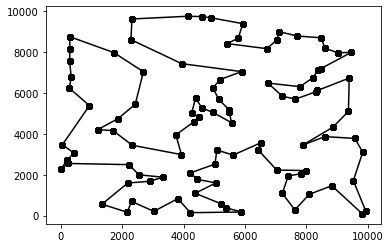

In [12]:
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(len(linkindex_p2)): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

    plt.plot(coordlct_x, coordlct_y, 'o', color='black');

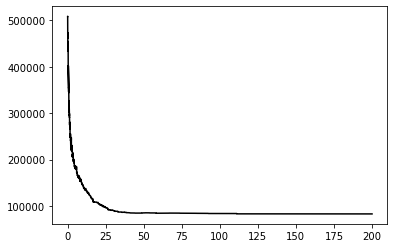

In [13]:
plt.plot(cputime_i[range(len(Objvalue_list))],Objvalue_list,'k-')

In [14]:
min(Objvalue_list)

83015.27580445274